# Hyperparameters

This example simulates the alignment of a KB mirror endstation (with four degrees of freedom).

In [1]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp
bec.disable_plots()

In [2]:
from blop.sim import Beamline

beamline = Beamline(name="bl")

In [3]:
from blop import DOF, Objective, Agent
from blop.digestion import beam_stats_digestion

dofs = [
    DOF(description="KBV downstream", device=beamline.kbv_dsv, search_domain=(-5.0, 5.0)),
    DOF(description="KBV upstream", device=beamline.kbv_usv, search_domain=(-5.0, 5.0)),
    DOF(description="KBH downstream", device=beamline.kbh_dsh, search_domain=(-5.0, 5.0)),
    DOF(description="KBH upstream", device=beamline.kbh_ush, search_domain=(-5.0, 5.0)),
]

objectives = [
    Objective(name="bl_det_sum", target="max", transform="log", trust_domain=(200, np.inf)),
    Objective(name="bl_det_wid_x", target="min", transform="log", latent_groups=[("bl_kbh_dsh", "bl_kbh_ush")]),
    Objective(name="bl_det_wid_y", target="min", transform="log", latent_groups=[("bl_kbv_dsv", "bl_kbv_usv")]),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    detectors=[beamline.det],
    digestion=beam_stats_digestion,
    digestion_kwargs={"image_key": "bl_det_image"},
    verbose=True,
    db=db,
    tolerate_acquisition_errors=False,
    enforce_all_objectives_valid=True,
    train_every=3,
)

(uid,) = RE(agent.learn("qr", n=32))

running iteration 1 / 1


Transient Scan ID: 1     Time: 2024-09-26 23:33:39
Persistent Unique Scan ID: '87557a0a-1733-497e-a20a-8d97c766f32e'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 23:33:39.6 |     -2.633 |      0.116 |      1.305 |      0.943 |    418.355 |      191.645 |      181.968 |       37.451 |       74.865 |
|         2 | 23:33:39.6 |     -4.785 |     -1.041 |      3.212 |      1.908 |    192.136 |      170.632 |      174.454 |      103.061 |       87.275 |
|         3 | 23:33:39.7 |     -2.499 |     -4.714 |      4.473 |      0.32

|         4 | 23:33:39.7 |     -4.022 |     -3.719 |      2.441 |     -1.397 |     38.471 |      122.525 |      149.059 |       16.819 |      130.994 |
|         5 | 23:33:39.8 |     -1.387 |     -2.389 |      1.202 |     -1.066 |    371.840 |      153.945 |      135.747 |       27.775 |      106.333 |
|         6 | 23:33:39.8 |      0.023 |     -3.198 |      2.643 |     -3.043 |     65.961 |      104.491 |      115.139 |        9.792 |       72.751 |
|         7 | 23:33:39.9 |      2.730 |     -2.024 |      3.872 |     -4.586 |     -1.767 |      180.723 |      128.012 |      288.287 |      226.465 |
|         8 | 23:33:39.9 |      2.244 |      2.872 |      1.913 |     -3.948 |    156.973 |      113.963 |      158.412 |       26.684 |       59.042 |


|         9 | 23:33:40.0 |      4.845 |      1.703 |      0.637 |     -3.656 |    199.443 |      134.886 |      111.683 |       64.438 |       67.172 |
|        10 | 23:33:40.0 |      3.178 |      3.214 |     -3.795 |     -2.442 |    157.046 |      219.931 |      149.500 |      139.365 |       75.085 |
|        11 | 23:33:40.1 |      0.788 |      1.889 |     -2.563 |     -0.236 |    492.567 |      243.152 |      165.478 |       96.125 |       16.261 |
|        12 | 23:33:40.1 |      0.327 |      4.602 |     -1.790 |      0.824 |    344.016 |      251.122 |      201.978 |       53.786 |       39.129 |
|        13 | 23:33:40.2 |     -0.237 |      3.786 |      0.071 |      1.276 |    480.282 |      223.000 |      207.462 |       19.271 |       28.457 |


|        14 | 23:33:40.2 |      3.014 |      0.932 |     -0.523 |      1.780 |    538.312 |      244.984 |      117.995 |       17.503 |       39.623 |
|        15 | 23:33:40.3 |      4.563 |     -0.607 |     -4.929 |      0.211 |    106.800 |      259.398 |       83.941 |       70.534 |       17.547 |
|        16 | 23:33:40.3 |      1.942 |     -4.281 |     -3.692 |      2.418 |     33.074 |      291.713 |       89.457 |       12.737 |       27.037 |
|        17 | 23:33:40.4 |      3.499 |     -4.623 |      0.599 |      4.003 |      3.274 |      202.655 |      164.437 |      352.490 |      247.198 |


|        18 | 23:33:40.4 |      4.091 |     -2.893 |     -0.722 |     -0.877 |      3.921 |      217.667 |      151.949 |      256.702 |      282.264 |
|        19 | 23:33:40.5 |      1.789 |     -1.563 |     -1.985 |     -1.835 |    449.522 |      202.128 |       98.945 |      125.183 |       35.619 |
|        20 | 23:33:40.5 |     -0.580 |     -2.694 |     -4.362 |     -4.701 |      1.719 |      195.420 |      121.634 |      173.389 |       81.240 |
|        21 | 23:33:40.6 |     -2.957 |     -1.520 |     -3.090 |     -2.533 |    152.270 |      213.030 |      166.654 |      141.696 |       99.739 |
|        22 | 23:33:40.6 |     -4.464 |      2.449 |     -2.355 |     -4.069 |     23.010 |      175.827 |      215.285 |      137.322 |       15.312 |


|        23 | 23:33:40.7 |     -2.158 |      3.618 |     -1.132 |     -3.150 |      3.417 |      206.057 |      150.285 |      376.070 |      244.754 |
|        24 | 23:33:40.7 |     -3.714 |      2.790 |      3.015 |     -0.438 |     87.506 |      130.364 |      217.013 |       42.482 |       12.469 |
|        25 | 23:33:40.8 |     -1.031 |      1.465 |      4.281 |     -2.020 |     17.126 |      100.615 |      186.250 |        4.558 |       30.300 |
|        26 | 23:33:40.8 |      3.768 |      4.297 |      4.844 |      3.068 |    127.850 |      172.208 |      158.089 |      125.988 |       97.937 |
|        27 | 23:33:40.9 |      1.446 |      0.472 |      3.621 |      4.610 |    191.152 |      210.222 |      134.440 |      155.000 |        9.444 |


|        28 | 23:33:40.9 |      1.129 |     -0.793 |      1.871 |      3.709 |    438.710 |      232.557 |      120.452 |      115.261 |       33.636 |
|        29 | 23:33:41.0 |     -0.729 |     -0.056 |     -0.152 |      4.190 |    322.843 |      269.837 |      159.337 |       52.157 |       55.600 |
|        30 | 23:33:41.0 |     -3.432 |     -3.886 |     -1.380 |      3.273 |     20.771 |      287.203 |      148.465 |       20.788 |      129.989 |
|        31 | 23:33:41.1 |     -1.692 |      0.985 |     -4.403 |      2.645 |     34.524 |      293.486 |      188.967 |        9.908 |       50.867 |
|        32 | 23:33:41.1 |     -4.306 |      4.810 |     -3.125 |      4.813 |      0.764 |      199.127 |      151.286 |      351.975 |      255.098 |


+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
generator list_scan ['87557a0a'] (scan num: 1)





trained model 'bl_det_sum' in 53 ms


trained model 'bl_det_wid_x' in 243 ms


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/botorch/optim/fit.py:104: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/botorch/optim/fit.py:104: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/botorch/optim/fit.py:104: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(


trained model 'bl_det_wid_y' in 1261 ms


In [4]:
RE(agent.learn("qei", n=4, iterations=4))

running iteration 1 / 4




Transient Scan ID: 2     Time: 2024-09-26 23:33:45
Persistent Unique Scan ID: 'e6dd334b-29a3-4062-b74d-d8d31013122e'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 23:33:45.5 |      0.527 |      3.478 |     -2.420 |      1.345 |    454.681 |      270.340 |      193.179 |       50.509 |       41.123 |
|         2 | 23:33:45.5 |      0.658 |      3.127 |     -1.717 |      0.457 |    526.347 |      242.588 |      185.920 |       61.279 |       36.152 |
|         3 | 23:33:45.6 |     -0.400 |      2.681 |     -0.484 |      0.242 |    543.381 |      21

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
generator list_scan ['e6dd334b'] (scan num: 2)





trained model 'bl_det_sum' in 202 ms


trained model 'bl_det_wid_x' in 442 ms


trained model 'bl_det_wid_y' in 351 ms
running iteration 2 / 4




Transient Scan ID: 3     Time: 2024-09-26 23:33:49
Persistent Unique Scan ID: 'bfac6c4a-a8ca-46ea-bb0b-2206ff05f773'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 23:33:49.1 |      1.218 |      0.736 |      0.269 |      1.443 |    549.803 |      222.375 |      141.972 |       24.875 |        8.770 |
|         2 | 23:33:49.1 |      0.337 |      1.688 |     -0.336 |      1.747 |    547.579 |      240.562 |      169.053 |       19.700 |        8.768 |
|         3 | 23:33:49.2 |      0.687 |      2.854 |     -1.130 |      1.374 |    549.710 |      24

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
generator list_scan ['bfac6c4a'] (scan num: 3)





trained model 'bl_det_sum' in 84 ms


trained model 'bl_det_wid_x' in 272 ms


trained model 'bl_det_wid_y' in 445 ms
running iteration 3 / 4




Transient Scan ID: 4     Time: 2024-09-26 23:33:52
Persistent Unique Scan ID: 'bef65c93-750c-4679-aaad-502c54cc7b89'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 23:33:52.8 |      0.537 |      3.660 |     -0.844 |      0.126 |    512.307 |      218.206 |      195.571 |       48.244 |       44.051 |
|         2 | 23:33:52.9 |      0.815 |      3.577 |     -0.975 |      0.151 |    518.810 |      221.522 |      190.392 |       50.939 |       47.625 |
|         3 | 23:33:52.9 |      0.577 |      2.575 |      0.305 |      1.836 |    539.124 |      22

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
generator list_scan ['bef65c93'] (scan num: 4)





trained model 'bl_det_sum' in 128 ms


trained model 'bl_det_wid_x' in 264 ms


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/botorch/optim/fit.py:104: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(


trained model 'bl_det_wid_y' in 877 ms
running iteration 4 / 4




Transient Scan ID: 5     Time: 2024-09-26 23:33:56
Persistent Unique Scan ID: '7a4fa466-ae0f-4ea3-bb91-a91a2e37fa2c'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 23:33:56.3 |      0.438 |      0.537 |     -0.068 |      0.908 |    549.898 |      218.428 |      150.480 |       16.787 |       21.741 |
|         2 | 23:33:56.3 |      1.010 |      0.958 |      0.232 |      0.705 |    545.165 |      208.438 |      148.045 |       16.413 |        8.729 |
|         3 | 23:33:56.4 |      0.947 |      3.322 |     -1.063 |      0.515 |    528.598 |      23

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
generator list_scan ['7a4fa466'] (scan num: 5)





trained model 'bl_det_sum' in 105 ms


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/botorch/optim/fit.py:104: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(


trained model 'bl_det_wid_x' in 672 ms


trained model 'bl_det_wid_y' in 349 ms


('e6dd334b-29a3-4062-b74d-d8d31013122e',
 'bfac6c4a-a8ca-46ea-bb0b-2206ff05f773',
 'bef65c93-750c-4679-aaad-502c54cc7b89',
 '7a4fa466-ae0f-4ea3-bb91-a91a2e37fa2c')

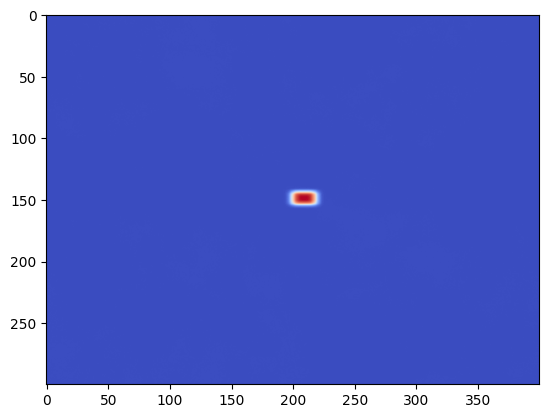

In [5]:
plt.imshow(agent.best.bl_det_image)

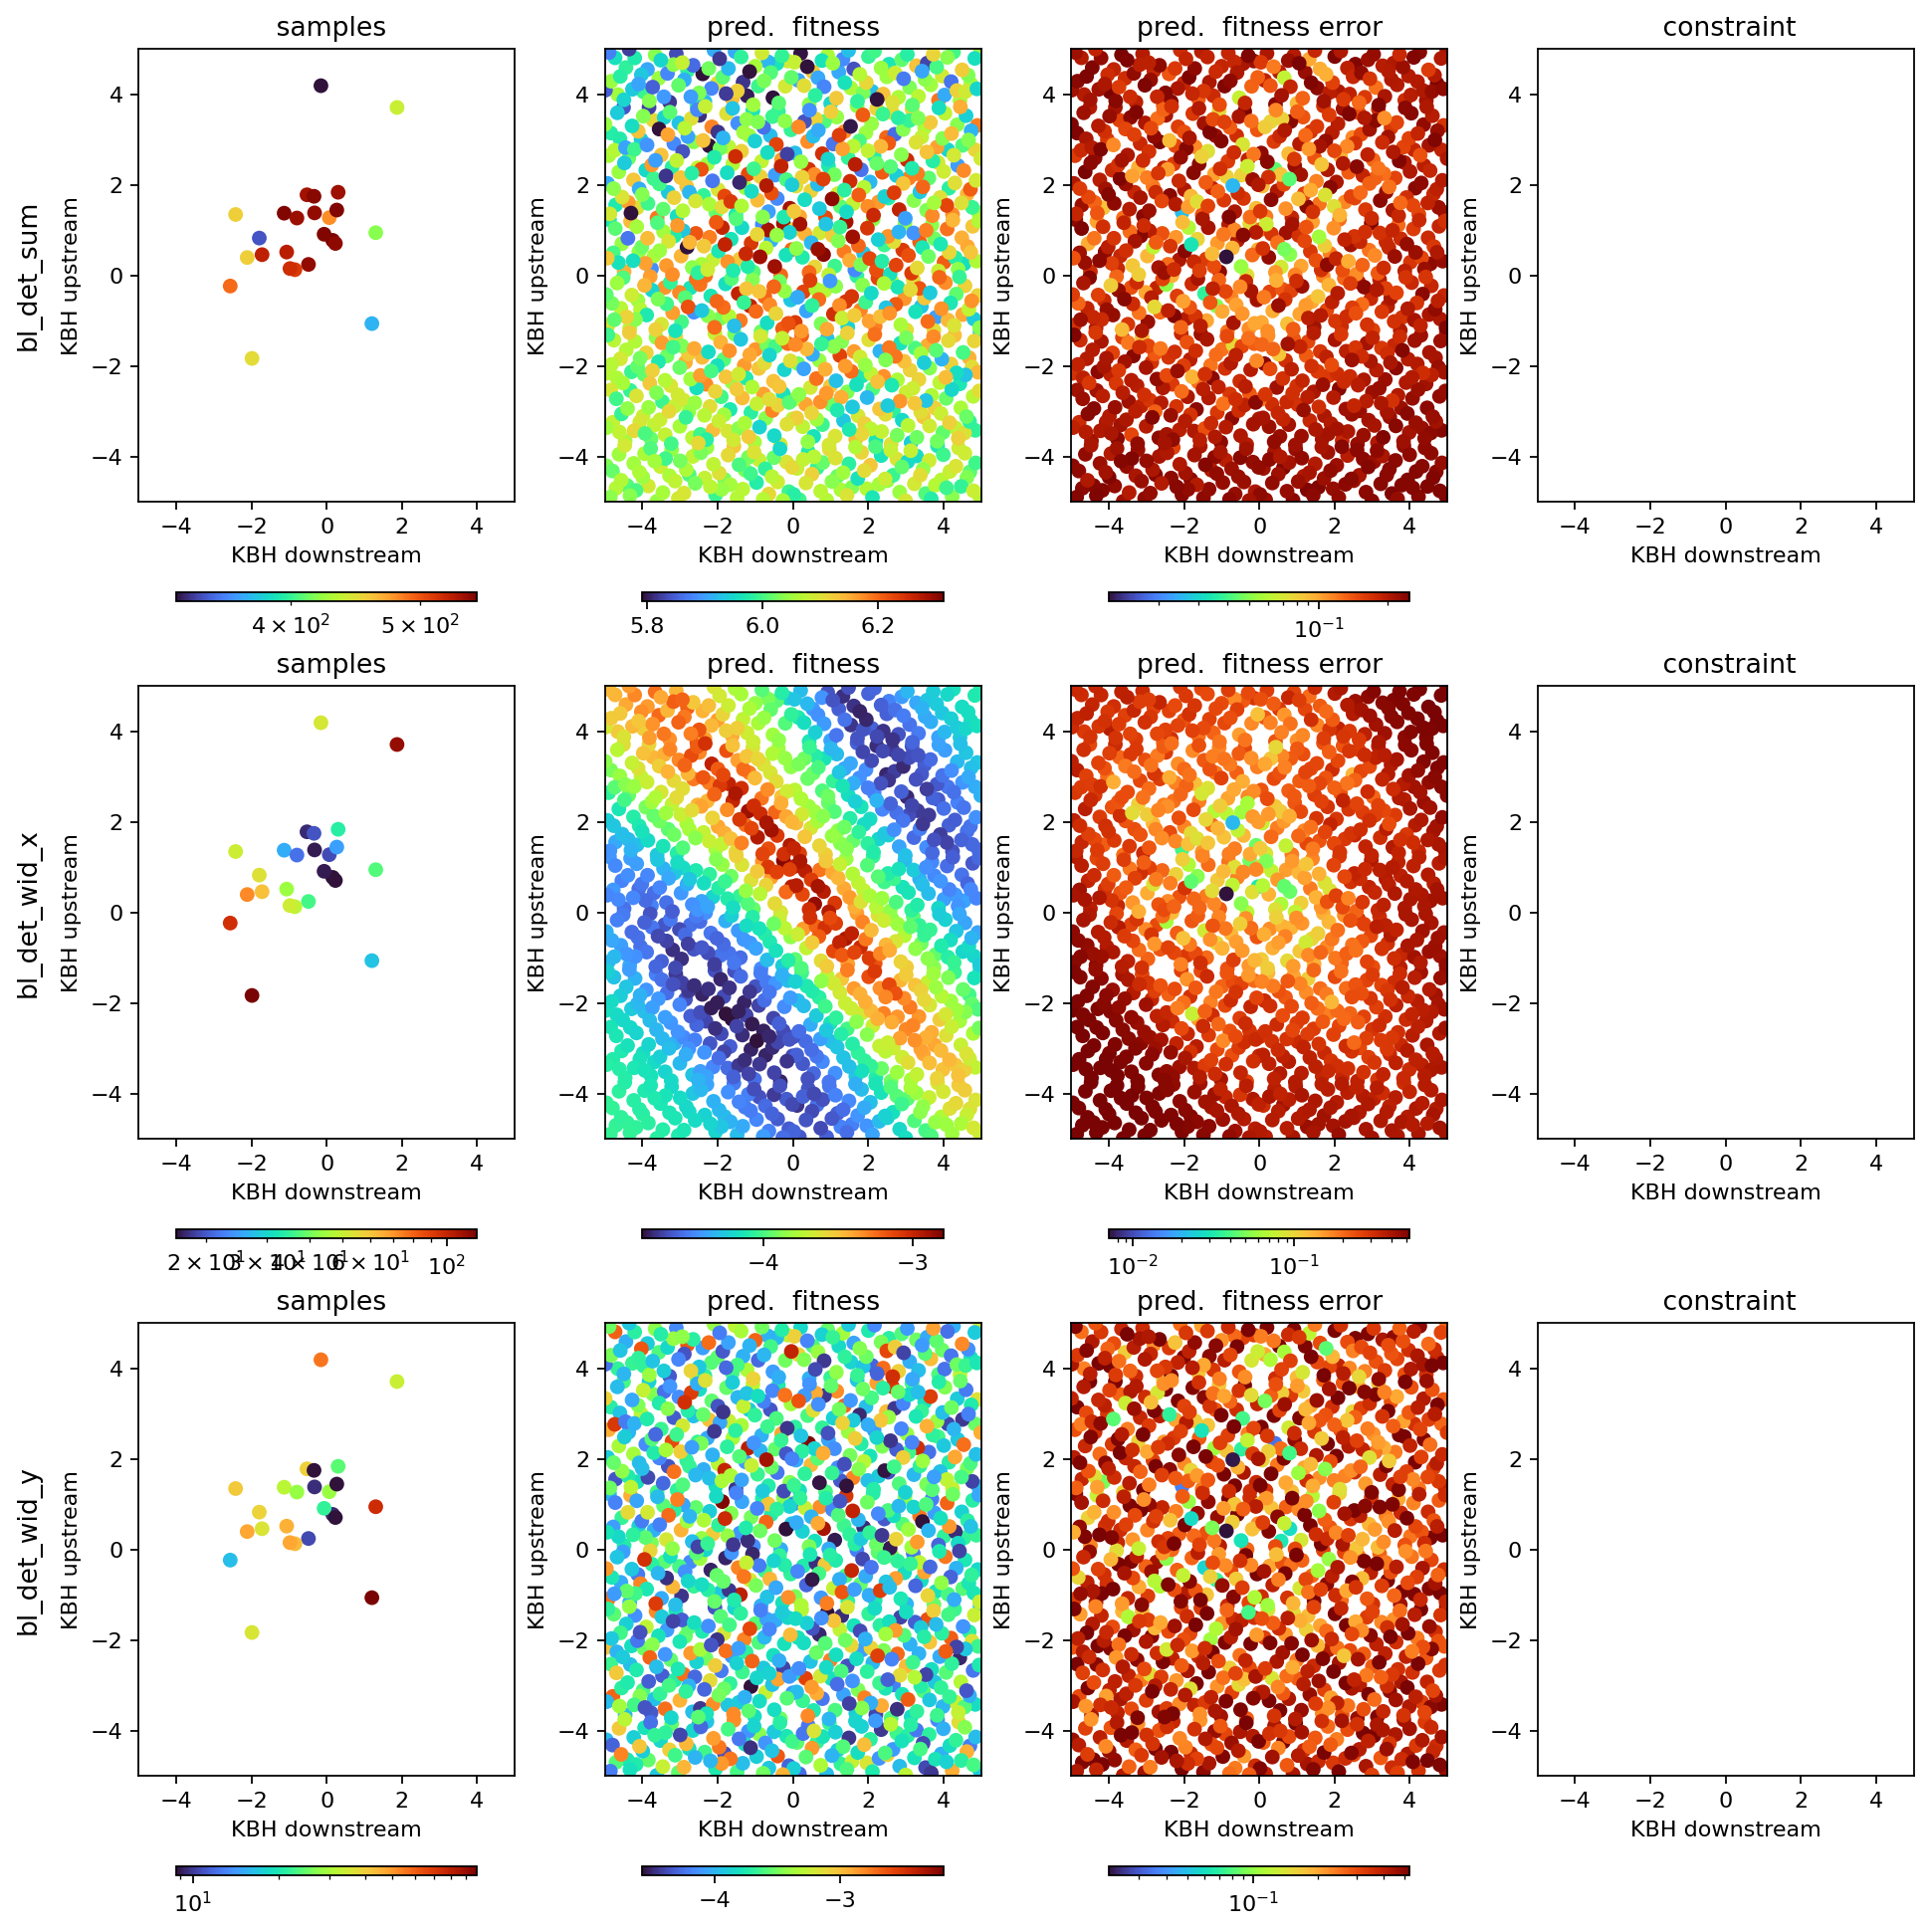

In [6]:
agent.plot_objectives(axes=(2, 3))